Data and Test Data loaded successfully.
Data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9666666666666667
Confusion Matrix:
[[1022    0    0    0    0    0    3    0    0    0]
 [   0 1143    0    0    0    0    3    0    0    0]
 [   9   17 1014    3    2    2    2   22    1    0]
 [   2    5    4 1110    0   10    2    6    5    7]
 [   2    7    0    0  993    0    3    1    0   18]
 [   2    2    0   19    1  861    9    0    1    3]
 [   8    2    0    0    0    2  997    0    1    0]
 [   0   26    2    0    2    0    0 1088    0   17]
 [   1   14    2   18    3   18    4    1  936    8]
 [   6    3    1   12   10    0    0   14    2  986]]


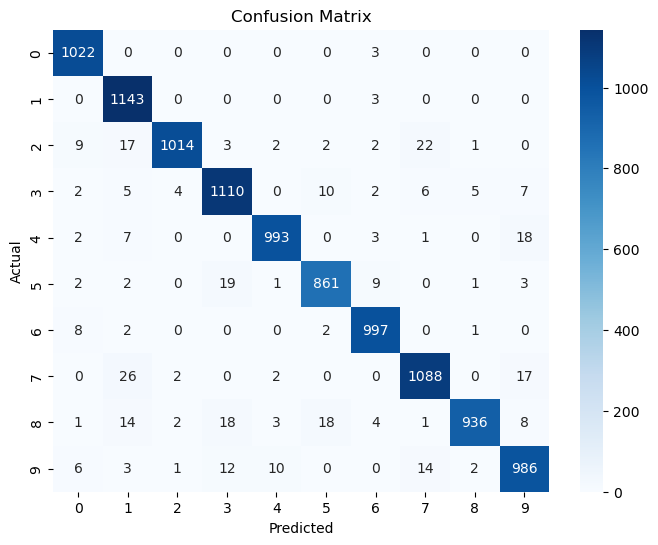

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf

# Load the data
try:
    data = pd.read_csv('data.csv')
    test_data = pd.read_csv('test.csv')
    print("Data and Test Data loaded successfully.")
except FileNotFoundError:
    print("The file was not found. Please ensure 'data.csv' and 'test.csv' are in the same directory as this notebook.")

# Display the first few rows of the dataframe
print("Data:")
print(data.head())
print("\nTest Data:")
print(test_data.head())

# Check for missing values
print("\nMissing values in data:")
print(data.isnull().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum())

# Handle missing values if any (for this example, we assume no missing values)
# data.fillna(data.mean(), inplace=True)
# test_data.fillna(test_data.mean(), inplace=True)

# Split the data into features and target variable
# Replace 'label' with the actual name of your target column if different
X = data.drop('label', axis=1)
y = data['label']

# Test data (if you have labels for test data, otherwise ignore this)
# Note: If the test data does not have labels, you cannot evaluate its accuracy.
X_test_data = test_data

# Implementing one scenario: Train-Test Split (75:25) and K = 5

# Split the data into training and testing sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the KNN model with K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Commenting Out Other Scenarios

# Different train-test splits and K values
splits = [0.4, 0.3, 0.25, 0.2, 0.1, 0.05]
k_values = [2, 4, 5, 6, 7, 10]

results = []

# Loop through each train-test split ratio
for split in splits:
    # Loop through each K value
    for k in k_values:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
        # Create and train the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        # Make predictions
        y_pred = knn.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        # Append the results
        results.append((split, k, accuracy, conf_matrix))

# Uncomment the following lines to print all results
# for result in results:
#     print(f"Train-Test Split: {1-result[0]:.2f}-{result[0]:.2f}, K: {result[1]}, Accuracy: {result[2]}")
#     print("Confusion Matrix:")
#     print(result[3])
#     print()

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Train-Test Split', 'K', 'Accuracy', 'Confusion Matrix'])

# Save results to CSV file
results_df.to_csv('knn_results.csv', index=False)

# Save a subset of the results to PDF (e.g., using matplotlib)

# Create a PDF file
pdf = matplotlib.backends.backend_pdf.PdfPages("knn_results.pdf")

for split, k, accuracy, conf_matrix in results:
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Train-Test Split: {1-split:.2f}-{split:.2f}, K: {k}, Accuracy: {accuracy:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    pdf.savefig()  # Save the current figure to the PDF
    plt.close()

pdf.close()

# Analysis (to be added to the PDF report)
analysis = """
## Analysis

### Impact of Train-Test Split
- Generally, a larger training set leads to better model performance because the model has more data to learn from.
- However, with very small training sets (e.g., 95:5 split), the model may not generalize well to new data.

### Impact of K Value
- Lower K values can lead to overfitting, where the model is too closely fitted to the training data.
- Higher K values can lead to underfitting, where the model is too simple to capture the underlying patterns in the data.
- The optimal K value often lies between these extremes, balancing bias and variance.

### Conclusion
- The performance of the KNN model depends on both the train-test split and the value of K.
- A balanced approach is necessary to ensure that the model generalizes well to new data.
"""

with open("analysis.txt", "w") as text_file:
    text_file.write(analysis)

print("Analysis written to 'analysis.txt'.")